In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
import itertools
from collections import Counter
import nltk
from nltk.stem.snowball import SnowballStemmer

import string
from nltk import wordpunct_tokenize

#from wordcloud import WordCloud
from datetime import datetime
import pickle
import re

#progress bar
from tqdm import tqdm, tqdm_notebook

# instantiate
tqdm.pandas(tqdm_notebook)

# model evaluation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#LDA
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import pyLDAvis.gensim
import pickle 
import pyLDAvis

c:\users\gabriele.ferrario\desktop\nuova cartella\dataanalyticsproject\data_venv\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


### Scommentare se si usano i dati iniziali

In [ ]:
'''dataReviewsChunk = pd.read_json('../data/reviews.json', lines=True, chunksize=10000)'''

In [ ]:
'''dataReviews'''

In [ ]:
'''
chunk_list = []  # append each chunk df here 

# Each chunk is in df format
for chunk in dataReviewsChunk:

    chunk_list.append(chunk)
'''

In [ ]:
#dataReviews = pd.concat(chunk_list)

In [ ]:
## elimino recensioni non verificate e quelli con helpfull == 0

In [ ]:
'''def convert_to_int(field):
    return field["$numberInt"]'''

In [ ]:
'''dataReviews["rating"]=dataReviews["rating"].apply(convert_to_int).astype(int)'''

In [ ]:
'''dataReviews["helpful"]=dataReviews["helpful"].apply(convert_to_int).astype(int)'''

In [ ]:
'''dataReviews = dataReviews.loc[dataReviews["verified"] == True]'''

In [ ]:
'''len(dataReviews.loc[dataReviews["verified"] == False])'''

In [ ]:
'''len(dataReviews.loc[dataReviews["helpful"] == 0]) - len(dataReviews.loc[dataReviews["helpful"] != 0])'''

In [ ]:
'''dataReviews = dataReviews.loc[dataReviews["helpful"] != 0]
dataReviews'''

### Dati filtrati (vedi sopra)

In [2]:
dataReviews = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

In [4]:
dataReviews

KeyboardInterrupt: 

In [ ]:
counts = dataReviews["rating"].value_counts()

In [ ]:
counts.values

In [ ]:
x = counts._index
print(x)
y = counts.values
print(y)

In [ ]:
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

In [ ]:
print("Proportion of review with score=1: {}%".format(len(dataReviews[dataReviews.rating == 1]) / len(dataReviews)*100))
print("Proportion of review with score=2: {}%".format(len(dataReviews[dataReviews.rating == 2]) / len(dataReviews)*100))
print("Proportion of review with score=3: {}%".format(len(dataReviews[dataReviews.rating == 3]) / len(dataReviews)*100))
print("Proportion of review with score=4: {}%".format(len(dataReviews[dataReviews.rating == 4]) / len(dataReviews)*100))
print("Proportion of review with score=5: {}%".format(len(dataReviews[dataReviews.rating == 5]) / len(dataReviews)*100))

In [6]:
# recensioni vuote
dataReviews[dataReviews["body"].str.len() == 0]

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body


In [3]:
dataReviews.loc[dataReviews['rating'] == 3 , 'polarity'] = 'neutral'
dataReviews.loc[dataReviews['rating'] > 3 , 'polarity'] = 'positive'
dataReviews.loc[dataReviews['rating'] < 3 , 'polarity'] = 'negative'

In [ ]:
counts = dataReviews["polarity"].value_counts()
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

In [4]:
def undersampling(df):
    positive, negative, _ = df.polarity.value_counts()
    df_positive = df[df.polarity == 'positive']
    df_positive = df_positive.sample(negative, random_state=1)
    df_negative = df[df.polarity == 'negative']
    df = pd.concat([df_positive, df_negative])
    #df = df.sample(frac=1)
    return df

In [5]:
new_dataReviews = undersampling(dataReviews)

In [ ]:
counts = new_dataReviews["polarity"].value_counts()
fig = plt.figure(figsize=(18,6))
sns.barplot(x=counts._index, y=counts.values)
plt.title("Rating distribution")
plt.show()

### Funzioni varie

In [ ]:
def flat_list(l):
    return  [item for sublist in l for item in sublist]

In [ ]:
def plot_common_tokens(tokens, title, n=20):
    sentences = (list(itertools.chain(tokens)))
    flat_sentences = flat_list(sentences)
    counts = Counter(flat_sentences)
    #print(counts.most_common(30))
    common_words = [word[0] for word in counts.most_common(n)]
    common_counts = [word[1] for word in counts.most_common(n)]
    fig = plt.figure(figsize=(18,6))
    sns.barplot(x=common_words, y=common_counts)
    plt.title(title)
    plt.show()

In [ ]:
def word_Cloud(sentences):
    flat_sentences = flat_list(sentences)
    unique_string=(" ").join(flat_sentences)

    wordcloud = WordCloud(background_color="white").generate(unique_string)
    plt.figure(figsize = (10, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

### Tokenizzazione

In [6]:
new_dataReviews['token']=new_dataReviews['body'].progress_apply(word_tokenize)

100%|█████████████████████████████████████████████████████████████████████████| 130648/130648 [02:50<00:00, 765.36it/s]


In [7]:
#new_dataReviews['token'] #Name: token, Length: 130648, dtype: object

### Stopwords

In [8]:
stop_words=nltk.corpus.stopwords.words('italian')
stop_words

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

In [9]:
new_dataReviews["cleaned"] = new_dataReviews["token"].progress_apply(lambda sentence : [word for word in sentence if word.lower() not in stop_words])

100%|████████████████████████████████████████████████████████████████████████| 130648/130648 [01:02<00:00, 2092.25it/s]


### Punctuation

In [10]:
punctuation = string.punctuation
punctuation = punctuation + "..."+ "''" + "``" + "--"+ ".."
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~...''``--..


In [11]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [word for word in sentence if word not in punctuation])

100%|███████████████████████████████████████████████████████████████████████| 130648/130648 [00:02<00:00, 48988.36it/s]


### Numbers

In [12]:
regex_numbers = r'(?:(?:\d+,?)+(?:\.?\d+)?)'

In [13]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [re.sub(regex_numbers,"",word) for word in sentence if re.sub(regex_numbers,"",word) != ""])

100%|████████████████████████████████████████████████████████████████████████| 130648/130648 [00:29<00:00, 4414.05it/s]


### Eliminazione token di lunghezza 1

In [14]:
new_dataReviews["cleaned"] = new_dataReviews["cleaned"].progress_apply(lambda sentence : [word for word in sentence if len(word)> 1])

100%|███████████████████████████████████████████████████████████████████████| 130648/130648 [00:03<00:00, 34339.57it/s]


In [ ]:
#new_dataReviews.to_csv("dati_puliti.csv")

In [ ]:
plot_common_tokens(new_dataReviews['cleaned'],'Most Common Tokens used in Reviews')

In [ ]:
word_Cloud(new_dataReviews["cleaned"])

In [ ]:
sentences = (list(itertools.chain(new_dataReviews["cleaned"])))
flat_sentences = flat_list(sentences)
counts = Counter(flat_sentences)
counts.most_common()

### Stemming

In [15]:
stemmer = SnowballStemmer("italian")
def stemming_token(sentence,stemmer):
    stem = []
    for elem in sentence:
        stem.append(stemmer.stem(elem))
    return stem

In [16]:
new_dataReviews["stemming"]=[stemming_token(row["cleaned"], stemmer) for _, row in tqdm(new_dataReviews.iterrows())]

130648it [07:38, 284.71it/s]


In [ ]:
#new_dataReviews = pd.read_csv("../data/dati_finali.csv", sep=",", index_col=0)

In [ ]:
### da fare solo se si legge il csv finale

In [ ]:
#def str_to_list(sentence):
#   return ast.literal_eval(sentence)

In [ ]:
#import ast

#new_dataReviews["stemming"] = new_dataReviews["stemming"].progress_apply(str_to_list)

In [22]:
new_dataReviews

,_id,product,title,author-id,author-name,date,rating,helpful,verified,body,polarity,token,cleaned,stemming
1199736,R1FQ5G2UV7V6M8,880788545X,bellissimo,AHHISDKF3EL22OZZALXXQPRKRT7A,cicciaepasticcia,2016-08-22,5,1,True,spero di apprendere bene da questo libro. Parl...,positive,"[spero, di, apprendere, bene, da, questo, libr...","[spero, apprendere, bene, libro, Parla, tarocc...","[sper, apprend, ben, libr, parl, tarocc, inten..."
30486,R2BHSNFH82TLUB,B0000C73CQ,Le più economiche nel loro genere.,AEHOPJ6X6NQ3IGSYLZH2BZ2NAAMQ,Lu,2016-10-29,4,1,True,Le più economiche per le fotocamere instax min...,positive,"[Le, più, economiche, per, le, fotocamere, ins...","[economiche, fotocamere, instax, mini, colori,...","[econom, fotocam, instax, min, color, buon, sp..."
1072897,R2EW9R2JU3P7FU,B077VKQ7JS,Ottima pellicola,AERVU3RINQWFZL7Q7CKICSLSAYJQ,Gianluca (OmniReviews),2018-04-18,5,4,True,La pellicola in vetro temperato EasyULT PRO+ è...,positive,"[La, pellicola, in, vetro, temperato, EasyULT,...","[pellicola, vetro, temperato, EasyULT, PRO+, u...","[pellicol, vetr, temper, easyult, pro+, un'ott..."
1341843,RFRPG3JB1EULX,B00XKGI3YG,Olio di mandorle,AHFYKADWWSEPG5ARKAQLJRRGY2UA,carmela,2017-08-03,5,1,True,Ottimo olio e ottimo prezzo. Io ne ho già fini...,positive,"[Ottimo, olio, e, ottimo, prezzo, ., Io, ne, h...","[Ottimo, olio, ottimo, prezzo, già, finito, bo...","[ottim, oli, ottim, prezz, già, fin, bottigl, ..."
664896,R18ZOXJ7AMYQ46,B01GO035T2,"L""estetica non fa giradischi",AHXY4APUBHOMDRAMQ7WONNPVXURA,Cosimo,2016-12-27,4,3,True,Le 4 stelle sono per come il venditore ha gest...,positive,"[Le, 4, stelle, sono, per, come, il, venditore...","[stelle, venditore, gestito, modo, impeccabile...","[stell, venditor, gest, mod, impecc, res, gira..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988679,R1B2HV209NM1N2,B07HG4QWZP,Resistenza praticamente inesistente,AF5PMRW2GS4HYIVQKMMUHOP4JREQ,Andrea,2018-10-27,1,4,True,La Cyclette è di buona fattura ma la resistenz...,negative,"[La, Cyclette, è, di, buona, fattura, ma, la, ...","[Cyclette, buona, fattura, resistenza, pratica...","[cyclett, buon, fattur, resistt, pratic, inesi..."
1988785,R2HOF6AD9IE2PX,B01J3S8MUO,PRODOTTO GIOCATTOLO,AERPIN4OWIYHPM7FMLY5UKX6EK7A,paolo,2018-12-12,1,2,True,ARRIVATA HO VISTO SUBITO UNA FATTURA DEL PRODO...,negative,"[ARRIVATA, HO, VISTO, SUBITO, UNA, FATTURA, DE...","[ARRIVATA, VISTO, SUBITO, FATTURA, PRODOTTO, G...","[arriv, vist, sub, fattur, prodott, giocattol,..."
1988809,R37L2PM7XTF7WO,B01J3S8MUO,do una stella perché non si può meno,AGDDOZ22SG4JCO6PPTTHYKQS7K4Q,Paolo,2018-06-05,1,1,True,prodotto inutile assistenza Numark inesistente...,negative,"[prodotto, inutile, assistenza, Numark, inesis...","[prodotto, inutile, assistenza, Numark, inesis...","[prodott, inutil, assistt, numark, inesistent,..."
1988814,RMRVNTAP1B3XX,B01J3S8MUO,MixTrack Platinum: ottimo hardware ma funziona...,AGMG2XLHRRY4EWHD5CBDYRH2XE4Q,Francesco,2017-07-09,2,8,True,Se avete intenzione di utilizzare Serato DJ qu...,negative,"[Se, avete, intenzione, di, utilizzare, Serato...","[intenzione, utilizzare, Serato, DJ, ottimo, c...","[intenzion, utilizz, ser, dj, ottim, controlle..."


In [21]:
len(new_dataReviews)

130648

### CountVectorizer

In [23]:
count_vect = CountVectorizer(stop_words=None, lowercase=True)
#lowercase = true -> Convert all characters to lowercase before tokenizing.
#stop_words = None -> If None, no stop words will be used
bow = count_vect.fit(new_dataReviews['stemming'].apply(lambda x: " ".join(x)))

In [ ]:
import pickle
with open('../model/bow.bin', 'wb') as f:
    pickle.dump(bow, f, pickle.HIGHEST_PROTOCOL)
#s = pickle.dumps(model)

In [13]:
with open('../model/bow.bin', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    bow = pickle.load(f)

c:\users\christian\universita\magistrale\ianno\dataanalytics\progetto\dataanalyticsproject\src\venv_da\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
count_vect

In [ ]:
#bow.get_feature_names()[::2000]

In [24]:
#X_train, X_test, y_train, y_test = train_test_split(bow, new_dataReviews['polarity'], test_size=0.2, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(new_dataReviews['stemming'].apply(lambda x: " ".join(x)), new_dataReviews['polarity'], test_size=0.2, random_state=1)    

In [ ]:
print("train size: ",len(X_train))
print("test size:",len(X_test))

In [ ]:
print("y train distribution:\n",y_train.value_counts())
print("y train distribution:\n",y_test.value_counts())

In [25]:
model = LogisticRegression()
model.fit(bow.transform(X_train), y_train)

c:\users\gabriele.ferrario\desktop\nuova cartella\dataanalyticsproject\data_venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
predictions = model.predict(bow.transform(X_test))

In [ ]:
predictions

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test, predictions)

0.9016073478760046

In [28]:
confusion_matrix(y_test, predictions)

array([[11841,  1269],
       [ 1302, 11718]], dtype=int64)

In [29]:
scores = cross_val_score(model, bow.transform(new_dataReviews['stemming'].apply(lambda x: " ".join(x))), new_dataReviews['polarity'], cv=10)

c:\users\gabriele.ferrario\desktop\nuova cartella\dataanalyticsproject\data_venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\gabriele.ferrario\desktop\nuova cartella\dataanalyticsproject\data_venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

In [30]:
scores

array([0.88962878, 0.89353234, 0.8898584 , 0.89506315, 0.88848067,
       0.89636433, 0.898584  , 0.89636433, 0.89796387, 0.8953613 ])

In [31]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)) 

Accuracy: 0.89 (+/- 0.01)


In [33]:
scoring = ['precision_macro', 'recall_macro']
scores = cross_validate(model, bow.transform(new_dataReviews['stemming'].apply(lambda x: " ".join(x))), new_dataReviews['polarity'], scoring=scoring,
                        cv=10, return_train_score=False)

c:\users\gabriele.ferrario\desktop\nuova cartella\dataanalyticsproject\data_venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\gabriele.ferrario\desktop\nuova cartella\dataanalyticsproject\data_venv\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alterna

In [39]:
scores

{'fit_time': array([6.61187005, 7.21620846, 8.31853032, 8.02033782, 8.56084299,
        8.59244061, 7.35404229, 9.81161404, 9.86038995, 8.95979071]),
 'score_time': array([0.36232567, 0.42972493, 0.37727523, 0.35288644, 0.30943131,
        0.39593744, 0.28548956, 0.39710116, 0.46380472, 0.32513905]),
 'test_precision_macro': array([0.88976512, 0.89359017, 0.88988233, 0.89511548, 0.88856254,
        0.89647233, 0.89863353, 0.89643927, 0.8979641 , 0.89540542]),
 'test_recall_macro': array([0.88962806, 0.89353187, 0.8898581 , 0.89506271, 0.88848123,
        0.89636496, 0.89858443, 0.89636486, 0.89796387, 0.8953613 ])}

In [37]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_precision_macro'].mean(), scores['test_precision_macro'].std() * 2)) 

Accuracy: 0.89 (+/- 0.01)


In [40]:
# for save model in file.bin
'''with open('../model/model2.bin', 'wb') as f:
    pickle.dump(model, f, pickle.HIGHEST_PROTOCOL)'''

### Use model with costum sentences

In [15]:
def clean_sentence(sentence):
    tokens = word_tokenize(sentence)
    tokens_clean = []
    for word in tokens:
        if word.lower() not in stop_words and word.lower() not in punctuation and not word.isnumeric() and len(word)> 1:
            
            tokens_clean.append(stemmer.stem(word))
    return ' '.join(tokens_clean)

In [ ]:
sentence="belle le scarpe e le stringhe per il colore , però sono comode"

In [ ]:
clean_sentence(sentence)

In [ ]:
print(bow.transform([clean_sentence(sentence)]))

In [ ]:
model.predict(bow.transform([clean_sentence(sentence)]))

In [3]:
#for load model
'''with open('../model/model.bin', 'rb') as f:
    # The protocol version used is detected automatically, so we do not
    # have to specify it.
    model = pickle.load(f)'''

c:\users\christian\universita\magistrale\ianno\dataanalytics\progetto\dataanalyticsproject\src\venv_da\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\christian\universita\magistrale\ianno\dataanalytics\progetto\dataanalyticsproject\src\venv_da\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LogisticRegression from version 0.21.3 when using version 0.23.1. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(


In [ ]:
model.predict(bow.transform([clean_sentence(sentence)]))

### LDA

In [ ]:
#https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

In [20]:
prod = "B0058BXHWE" 
new_dataReviews_prodotto = new_dataReviews[new_dataReviews["product"]  == prod]

In [65]:
texts = new_dataReviews_prodotto['cleaned']

In [66]:
# creo il dizionario
dictionary = corpora.Dictionary(texts) 

In [67]:
# Term Document Frequency -> converto testo in array
corpus = [dictionary.doc2bow(text) for text in texts]
#corpus

In [23]:
'''lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=dictionary,
                                       num_topics=10, 
                                       random_state=1,
                                       chunksize=100,
                                       passes=10,
                                       per_word_topics=True)'''

'lda_model = gensim.models.LdaMulticore(corpus=corpus,\n                                       id2word=dictionary,\n                                       num_topics=10, \n                                       random_state=1,\n                                       chunksize=100,\n                                       passes=10,\n                                       per_word_topics=True)'

In [ ]:
#lda_model.print_topics()

In [ ]:
'''doc_lda = lda_model[corpus]
doc_lda'''

In [ ]:
# Compute Coherence Score
'''coherence_model_lda = CoherenceModel(model=lda_model, texts=new_dataReviews['stemming'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)'''

In [24]:
def compute_coherence_values(corpus, dictionary, num_topics, texts):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=num_topics, 
                                           random_state=1)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [31]:
def optimal_topics(dictionary, corpus, texts, max_topic):
    count=1
    c_v = []
    for num_topics in range(1, max_topic):
        print(count)
        coherence =  compute_coherence_values(corpus, dictionary, num_topics, texts)
        
        c_v.append(coherence)
        count += 1
    x = range(1, max_topic)
    plt.plot(x, c_v)
    plt.xlabel("num_topics")
    plt.ylabel("Coherence score")
    plt.legend(("c_v"), loc='best')
    plt.show()

    return c_v

1
2
3
4
5
6
7
8
9


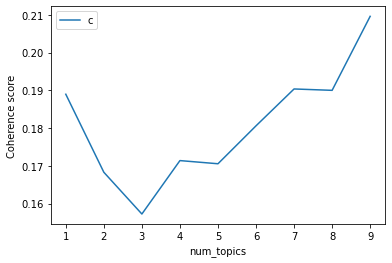

In [68]:
num_topics = optimal_topics(dictionary=dictionary, corpus=corpus, texts=texts, max_topic=10)

In [69]:
num_topics

[0.18900014494660183,
 0.16831860010501493,
 0.15725204648335978,
 0.17141332738157988,
 0.1705730162371387,
 0.18062878079646327,
 0.1903992989431189,
 0.19003439968291586,
 0.209651023167712]

In [70]:
ntopics=num_topics.index(max(num_topics))+1

In [71]:
ldamodel = gensim.models.ldamulticore.LdaMulticore(corpus, num_topics=ntopics, id2word=dictionary)

In [62]:
#ldamodel.save('ldamodel1.gensim')

In [72]:
topics = ldamodel.print_topics()

In [73]:
topics

[(0,
  '0.017*"ferro" + 0.012*"stiro" + 0.008*"vapore" + 0.008*"acqua" + 0.005*"acquisto" + 0.005*"solo" + 0.005*"prodotto" + 0.004*"qualità" + 0.004*"serbatoio" + 0.004*"molto"'),
 (1,
  '0.016*"ferro" + 0.012*"vapore" + 0.010*"acqua" + 0.007*"stiro" + 0.007*"molto" + 0.006*"piastra" + 0.005*"prodotto" + 0.005*"già" + 0.005*"senza" + 0.005*"comprato"'),
 (2,
  '0.009*"poco" + 0.009*"vapore" + 0.008*"acqua" + 0.008*"bene" + 0.007*"stiro" + 0.006*"ottimo" + 0.005*"pesante" + 0.005*"sempre" + 0.005*"ferro" + 0.004*"solo"'),
 (3,
  '0.021*"ferro" + 0.015*"vapore" + 0.011*"stiro" + 0.008*"molto" + 0.008*"stirare" + 0.008*"Rowenta" + 0.007*"acqua" + 0.006*"senza" + 0.005*"poco" + 0.005*"qualità"'),
 (4,
  '0.023*"ferro" + 0.010*"vapore" + 0.009*"stiro" + 0.007*"molto" + 0.007*"Amazon" + 0.006*"acqua" + 0.006*"prodotto" + 0.005*"bene" + 0.005*"caldaia" + 0.005*"poco"'),
 (5,
  '0.024*"ferro" + 0.011*"stiro" + 0.010*"molto" + 0.009*"vapore" + 0.007*"stira" + 0.006*"stirare" + 0.006*"prodotto"

In [74]:
x = ldamodel.show_topics(num_topics=ntopics, num_words=15, formatted=False)
topics_words = [[wd[0] for wd in tp[1]] for tp in x]

In [75]:
for sentence in topics_words:
    print(" ".join(sentence))

ferro stiro vapore acqua acquisto solo prodotto qualità serbatoio molto perde piastra .... quindi mesi
ferro vapore acqua stiro molto piastra prodotto già senza comprato madre nuovo fa stirare l'acqua
poco vapore acqua bene stiro ottimo pesante sempre ferro solo Ferro stiratura piastra continuo molto
ferro vapore stiro molto stirare Rowenta acqua senza poco qualità fa prodotto prezzo bene piastra
ferro vapore stiro molto Amazon acqua prodotto bene caldaia poco stirare stato senza me prezzo
ferro stiro molto vapore stira stirare prodotto volta solo tanto perchè bene sempre recensioni acqua
ferro stiro me acqua dopo prodotto vapore molto sempre stirare trovo già subito corto prima
ferro acqua molto vapore prodotto tempo stiro dopo funzione piastra caldaia poi garanzia avere essere
ferro stiro vapore prodotto bene molto dopo acqua poco l'ho stirare piastra qualità usato serbatoio


In [78]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.040389  0.059735       1        1  21.920906
3      0.061466 -0.012569       2        1  18.674334
5      0.007251 -0.021539       3        1  17.484007
7     -0.017129  0.003015       4        1  14.636114
4      0.022864 -0.077638       5        1   6.935452
1     -0.008145  0.022594       6        1   6.653984
0     -0.009177  0.007444       7        1   4.829500
6     -0.015296  0.032184       8        1   4.476373
2     -0.082223 -0.013226       9        1   4.389331, topic_info=         Term        Freq       Total Category  logprob  loglift
26      ferro  148.000000  148.000000  Default  30.0000  30.0000
32      stiro   73.000000   73.000000  Default  29.0000  29.0000
5       acqua   48.000000   48.000000  Default  28.0000  28.0000
213      poco   26.000000   26.000000  Default  27.0000  27.0000
57     vapore   72.000000   72.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
180  rispetto    0.842832    8.864506   Topic9  -5.8285   0.7730
75       dopo    0.978675   28.760033   Topic9  -5.6791  -0.2545
171     molto    1.059948   51.791847   Topic9  -5.5993  -0.7630
39    camicie    0.849986   11.026746   Topic9  -5.8201   0.5631
98      punta    0.844165   15.817045   Topic9  -5.8270   0.1955

[660 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
1186      1  0.661482     -€
649       1  0.096822   ....
649       2  0.096822   ....
649       3  0.290467   ....
649       4  0.193644   ....
...     ...       ...    ...
521       4  0.164887  volte
521       6  0.082443  volte
521       9  0.082443  volte
1585      2  0.839242   watt
850       6  0.581869   zero

[1137 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 4, 6, 8, 5, 2, 1, 7, 3])

In [79]:
text_data = []
for sentence in new_dataReviews_prodotto['cleaned']:
    bigram = list(nltk.bigrams(sentence))
    tokens = []
    for i in bigram:
        tokens.append((''.join([w + ' ' for w in i])).strip())
    text_data.append(tokens)

In [80]:
text_data

[['Acquistato luglio',
  'luglio Usato',
  'Usato regolarmente',
  'regolarmente senza',
  'senza nessun',
  'nessun problema',
  'problema utilizzando',
  'utilizzando acqua',
  'acqua rubinetto',
  'rubinetto moglie',
  'moglie ancora',
  'ancora entusiasta',
  "entusiasta dell'acquisto",
  "dell'acquisto Prezzo",
  'Prezzo Amazon',
  'Amazon migliore',
  'migliore mercato',
  'mercato Consigliato',
  'Consigliato collaudato'],
 ['buon ferro',
  'ferro stiro',
  'stiro considerando',
  'considerando averlo',
  'averlo preso',
  'preso sconto',
  'sconto spesi',
  'spesi stati',
  'stati veramente',
  'veramente affare',
  'affare Ottimo',
  'Ottimo prestazioni',
  'prestazioni Spedizione',
  'Spedizione velocissima'],
 ['perfetto pesante',
  'pesante senso',
  'senso buono',
  'buono utile',
  'utile stirare',
  'stirare bene',
  'bene camicie',
  'camicie jeans',
  'jeans serbatoio',
  "serbatoio dell'acqua",
  "dell'acqua dura",
  'dura abbastanza',
  'abbastanza stirare',
  'stira

In [81]:
texts=text_data
dictionary = corpora.Dictionary(texts) 
corpus = [dictionary.doc2bow(text) for text in texts]

1
2
3
4
5
6
7
8
9


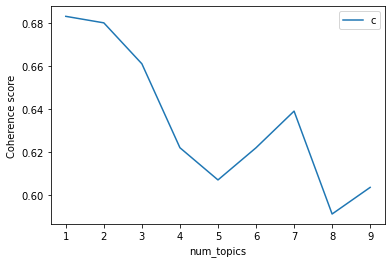

In [82]:
num_topics = optimal_topics(dictionary=dictionary, corpus=corpus, texts=texts, max_topic=10)

In [83]:
ntopics=num_topics.index(max(num_topics))+1
ldamodel = gensim.models.ldamulticore.LdaMulticore(corpus, num_topics=ntopics, id2word=dictionary)

In [86]:
topics = ldamodel.print_topics()
x = ldamodel.show_topics(num_topics=ntopics, num_words=15, formatted=False)
topics_words = [[wd[0] for wd in tp[1]] for tp in x]
for sentence in topics_words:
    print(sentence)

['ferro stiro', 'perdere acqua', 'ferri stiro', 'ferro caldaia', 'perde acqua', 'cominciato perdere', 'Ferro stiro', 'perdeva acqua', 'recensioni positive', 'ottimo ferro', 'getto vapore', 'prima volta', 'scelto ferro', 'ECO Intelligence', 'DW ECO']


In [88]:
ntopics

1

In [84]:
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
LDAvis_prepared

AssertionError: 

### Sentimenti recensioni neutre

In [ ]:
dataReviews_neutre = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

In [ ]:
dataReviews_neutre = dataReviews_neutre.loc[dataReviews_neutre["rating"]==3]

In [ ]:
dataReviews_neutre

In [ ]:
dataReviews_neutre["polarity"] = dataReviews_neutre["body"].progress_apply(lambda sentence: model.predict(bow.transform([clean_sentence(sentence)])))

In [ ]:
dataReviews_neutre["polarity"]

In [ ]:
print("Proportion of review with score=3 that is positive: {}%".format(len(dataReviews_neutre[dataReviews_neutre.polarity == "positive"]) / len(dataReviews_neutre)*100))
print("Proportion of review with score=3 that is negative: {}%".format(len(dataReviews_neutre[dataReviews_neutre.polarity == "negative"]) / len(dataReviews_neutre)*100))

In [ ]:
dataReviews_neutre["polarity"].value_counts().plot(kind="bar")


### Prodotti nel tempo

In [57]:
dataReviews = pd.read_csv("../data/dati_ridotti.csv", sep=",", index_col=0)

In [69]:
# look for good examples
dataReviews.groupby('product').count().sort_values('_id', ascending=False).head(10)

,_id,title,author-id,author-name,date,rating,helpful,verified,body
product,,,,,,,,,
B01ETRGE7M,918,918,918,918,918,918,918,918,918
B00LPHUTOO,774,774,774,774,774,774,774,774,774
B01EWQ10D8,713,713,713,713,713,713,713,713,713
B0058BXHWE,476,476,476,476,476,476,476,476,476
B01H1LOZTC,474,474,474,474,474,474,474,474,474
B00563OEEY,460,460,460,460,460,460,460,460,460
B00405RLBM,444,444,444,444,444,444,444,444,444
B008Y6IN3S,441,441,441,441,441,441,441,441,441
B00KWHJY7Q,435,435,435,435,435,435,435,435,435


In [86]:
# GOOD EXAMPLES:
# B01ETRGE7M bello
# B00LPHUTOO altalena
# B01EWQ10D8 non male
# B0058BXHWE resegono
# ... non ne ho piu provati di quelli del box sopra
prod = "B0058BXHWE" 
dataReviews_prodotto = dataReviews[dataReviews["product"]  == prod]
len(dataReviews_prodotto)

476

In [87]:
dataReviews_prodotto["date"] = dataReviews_prodotto["date"].progress_apply(lambda string: datetime.strptime(string, '%Y-%m-%d')) 

100%|█████████████████████████████████████████████| 476/476 [00:00<00:00, 39692.41it/s]
<ipython-input-87-55469c4cc141>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataReviews_prodotto["date"] = dataReviews_prodotto["date"].progress_apply(lambda string: datetime.strptime(string, '%Y-%m-%d'))


In [88]:
dataReviews_prodotto=dataReviews_prodotto.assign(
    Period=dataReviews_prodotto.date.dt.to_period('M')
)


In [89]:
dataReviews_prodotto["polarity"] = dataReviews_prodotto["body"].progress_apply(lambda sentence: model.predict(bow.transform([clean_sentence(sentence)]))[0])

100%|███████████████████████████████████████████████| 476/476 [00:01<00:00, 311.24it/s]


In [90]:
dataReviews_prodotto_month = dataReviews_prodotto.groupby(['Period']).progress_apply(lambda x: len(x.loc[x["polarity"]=="positive"])/len(x))

# use the rating intead of polarity
dataReviews_prodotto_month_rat = dataReviews_prodotto.groupby(['Period']).progress_apply(lambda x: len(x.loc[x["rating"]>3])/len(x))




100%|█████████████████████████████████████████████████| 77/77 [00:00<00:00, 563.41it/s]


In [91]:
dataReviews_prodotto_month.head(20)

Period
2012-06    1.000000
2012-08    1.000000
2012-09    1.000000
2012-11    1.000000
2012-12    1.000000
2013-01    1.000000
2013-02    0.500000
2013-04    0.000000
2013-05    0.000000
2013-06    0.000000
2013-08    1.000000
2013-09    1.000000
2013-10    1.000000
2013-11    1.000000
2013-12    1.000000
2014-01    0.750000
2014-02    0.500000
2014-03    0.916667
2014-04    0.500000
2014-05    0.000000
Freq: M, dtype: float64

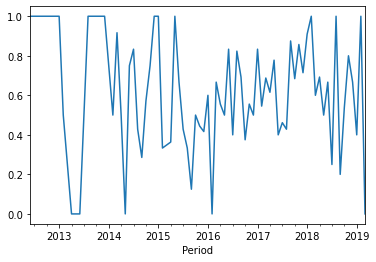

In [92]:
dataReviews_prodotto_month.plot()

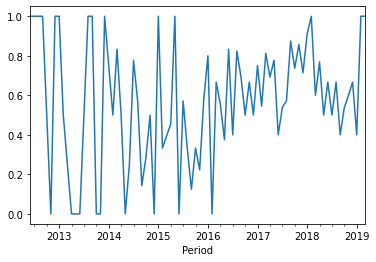

In [93]:
dataReviews_prodotto_month_rat.plot()

In [44]:
str(dataReviews_prodotto["date"])

'15374   2019-01-14\n15375   2017-12-31\n15376   2018-10-13\n15377   2018-09-22\n15378   2019-01-09\n           ...    \n20291   2018-11-09\n20329   2018-10-04\n20340   2017-11-29\n20355   2017-11-15\n20361   2018-01-12\nName: date, Length: 918, dtype: datetime64[ns]'

In [ ]:
import datetime
# considero periodi di 6 mesi
def manage_date(date):
    date= str(date)
    datee = datetime.datetime.strptime(str(date), "%Y-%m")
    six=1
    if (datee.month > 6):
        six=2
    return str(datee.year)+"-"+str(six)